<a href="https://colab.research.google.com/github/albaMCh/Numpy/blob/main/Proyecto_Final_Numpy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulacion de MonteCarlo

La simulación de MonteCarlo debe su nombre al famoso casino de Mónaco debido a que la ruleta es el juego de casino más famoso y un mecanismo muy sencillo de generar números aleatorios.

El objetivo principal de la simulación de Montecarlo es intentar imitar el comportamiento de variables reales para, en la medida de lo posible, analizar o predecir cómo van a evolucionar.

En economía, la simulación de Montecarlo se utiliza tanto en empresas como en inversión. Siendo en el mundo de la inversión donde más se utiliza.

Dado que la rentabilidad de una inversión es impredecible, se utiliza este tipo de método para evaluar distintos tipos de escenarios.




##Caso a realizar

Para este ejemplo, intentaremos predecir cuánto dinero debemos presupuestar para las comisiones de ventas para el próximo año. Este problema es útil para el modelado porque tenemos una fórmula definida para calcular las comisiones y probablemente tengamos algo de experiencia con los pagos de comisiones de años anteriores.

Este problema también es importante desde una perspectiva comercial. Las comisiones de ventas pueden ser un gran gasto de venta y es importante planificar adecuadamente este gasto. Además, el uso de una simulación de Monte Carlo es una mejora relativamente simple que se puede realizar para aumentar lo que normalmente es un proceso de estimación poco sofisticado.

En este ejemplo, la comisión de ventas de muestra se vería así para una fuerza de ventas de 5 personas:

|Vendedor|Objetivo Ventas| Ventas reales| % Conseguido|Ratio de Comision|Cantidad de Comision|
---|---|---|---|---|---|
1|100000€|88000|88%|2%|1760€
2|200000€|202000|101%|4%|8080€
3|75000€|90000|120%|4%|3600€
4|400000€|360000|90%|2%|7200€
5|500000€|35000|70%|0%|0€

El ratio de comision se obtiene segun el porcentaje conseguido:

|% ventas conseguid|Ratio de comisión|
|---|---|
|80-90%|2%|
|91-99%|3%|
|>=100%|4%|

Imagina que tu tarea como analista es decirle a finanzas cuánto presupuestar para las comisiones de ventas para el próximo año. Un enfoque podría ser asumir que todos hacen el 100% de su objetivo y ganan la tasa de comisión del 4%. 

|Vendedor|Objetivo Ventas| Ventas reales| % Conseguido|Ratio de Comision|Cantidad de Comision|
---|---|---|---|---|---|
1|100000€|100000€|100%|4%|4000€
2|200000€|200000€|100%|4%|8080€
3|75000€|75000€|100%|4%|3000€
4|400000€|400000€|100%|4%|16000€
5|500000€|500000€|100%|4%|20000€

Finanzas te diriía que ya les gustaría que se cumpliese ese escenario, pero que necesitan uno realista. Por lo que decides presentar otras dos opciones:

Opcion 1:

|Vendedor|Objetivo Ventas| Ventas reales| % Conseguido|Ratio de Comision|Cantidad de Comision|
---|---|---|---|---|---|
1|100000€|95000|95%|3%|2850€
2|200000€|204000|102%|4%|8160€
3|75000€|60000|80%|2%|1200€
4|400000€|480000|120%|4%|19200€
5|500000€|40000|80%|2%|8000€

Total: 39410€

Opcion 2:

|Vendedor|Objetivo Ventas| Ventas reales| % Conseguido|Ratio de Comision|Cantidad de Comision|
---|---|---|---|---|---|
1|100000€|10500|105%|4%|4200€
2|200000€|14000|70%|0%|0€
3|75000€|74250|99%|3%|2228€
4|400000€|352000|88%|2%|7040€
5|500000€|55000|110%|4%|22000€

Total:35468€


Esta vez finanzas dice: “este rango es útil, pero ¿cuál es la probabilidad de que se cumpla alguno de estos dos escenarios? Además, necesitamos que haga esto para un equipo de ventas de 500 personas y modele varias tarifas diferentes para determinar la cantidad a presupuestar”. 

Este enfoque simple ilustra el método iterativo básico para una simulación de Monte Carlo. Repita este proceso muchas veces para determinar un rango de valores de comisión potenciales para el año. Hacer esto manualmente a mano es un desafío. Afortunadamente, Python hace que este enfoque sea mucho más simple.


En su nivel más simple, un análisis (o simulación) de Monte Carlo implica ejecutar muchos escenarios con diferentes entradas aleatorias y resumir la distribución de los resultados.

Usando el análisis de comisiones, podemos continuar con el proceso manual que comenzamos anteriormente, pero ejecutar el programa 100 o incluso 1000 veces y obtendremos una distribución de los posibles montos de las comisiones. Esta distribución puede informar la probabilidad de que el gasto se encuentre dentro de una determinada ventana. Al final del día, esta es una predicción, por lo que probablemente nunca la predeciremos con exactitud. Podemos desarrollar una idea más informada sobre el riesgo potencial de sub o sobre presupuestar.

Hay dos componentes para ejecutar una simulación de Monte Carlo:

* la ecuacion a evaluar
* las variables aleatorias para la entrada

Para las variables de entrada podemos obserbar los datos históricos en el siguiente grafico donde la x es el % de ventas conseguido y la y es la frecuencia que se ha obtenido dicho porcentaje.

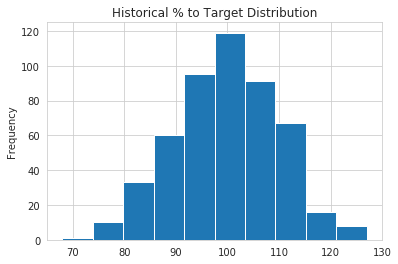

Esta distribución parece una distribución normal con una media del 100 % y una desviación estándar del 10 %. Esta información es útil porque podemos modelar nuestra distribución de variables de entrada para que sea similar a nuestra experiencia en el mundo real.

#Recrea los datos históricos usando Numpy

Utiliza la función predeterminada de Numpy np.random.normal para recrear los datos históricos con 500 repeticiones y almacena su resultado en la variable pct_ventas 

In [ ]:
import numpy as np
#genera los datos de porcentaje de ventas históricos con una distribución normal con media 1, derivación estandar 0.1 y 500 datos.
pct_ventas = np.random.normal(loc=1, scale=0.1, size= 500)

print(pct_ventas[:10])

[0.90698903 1.1168485  1.16275427 0.95752662 1.12626433 0.98488652
 0.9760956  1.08457667 0.99437453 1.01884822]


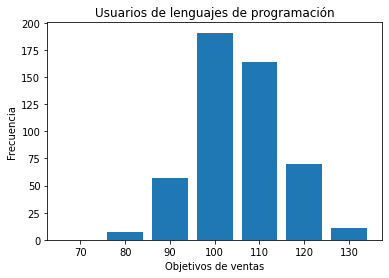

'Datos historicos generados correctos'

In [ ]:
#@title Comprueba los datos historicos generados
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
list_percent=list(range(70,135,10))
setenta=0
ochenta=0
noventa=0
cien=0
ciendiez=0
cienveint=0
mascientoveint=0
for i in pct_ventas:
  if i<=0.70:
    setenta+=1
  elif i>0.70 and i<=0.80:
    ochenta+=1
  elif i>0.80 and i<=0.90:
    noventa+=1
  elif i>0.90 and i<=1.00:
    cien+=1
  elif i>1.00 and i<=1.10:
    ciendiez+=1
  elif i>1.10 and i<=1.20:
    cienveint+=1
  elif i>1.20:
    mascientoveint+=1
result=[setenta, ochenta, noventa, cien, ciendiez, cienveint,mascientoveint]





# counts=[np.sum(pct_ventas<=70),np.sum(70<pct_ventas and pct_ventas<=80),np.sum(80<pct_ventas and pct_ventas <=90),np.sum(90<pct_ventas and pct_ventas <=100),np.sum(100<pct_ventas and pct_ventas <=110),np.sum(110<pct_ventas and pct_ventas <=120),np.sum(pct_ventas>=120)]

plt.bar([str(z) for z in list_percent], result)
 
plt.ylabel('Frecuencia')
 
plt.xlabel('Objetivos de ventas')

plt.title('Usuarios de lenguajes de programación')

plt.show()
def check():
  if pct_ventas.std().round(1)==0.1 and pct_ventas.mean().round(0):
    return 'Datos historicos generados correctos'
  else:
    return 'Los datos históricos generados no son correctos'
check()

#Recrea el histórico de objetivos de ventas 

Hay otro valor que necesitamos simular y es el objetivo de ventas real. Para ilustrar una distribución diferente, vamos a suponer que la distribución de nuestro objetivo de ventas se parece a esto:

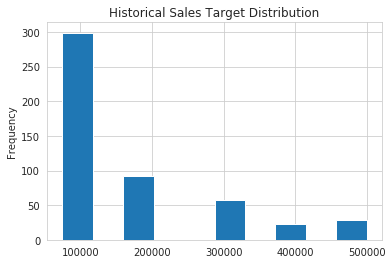
Definitivamente no se trata de una distribución normal. Esta distribución nos muestra que los objetivos de ventas se establecen entre 5 posibilidades y la frecuencia es menor a medida que el obtjetivo es más elevado.

Esta distribución podría ser indicativa de un proceso de fijación de objetivos muy simple en el que las personas se agrupan en determinados grupos y se les asignan objetivos de forma coherente en función de su antigüedad, el tamaño del territorio o las ventas conseguidas el año anterior.

Para este ejemplo, utilizaremos una distribución uniforme pero asignaremos tasas de probabilidad más bajas para algunos de los valores.

In [ ]:
#Recrea los objetivos de venta históricos con una distribuión uniforme para los siguientes datos:
sales_target_values = [ 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [.6, .2, .1, .05, .05]

from itertools import accumulate
import random
from collections import Counter

def elige_con_probabilidad(datos, pesos):
  suma = sum(pesos)
  pesos = accumulate(peso/suma for peso in pesos)
  r = random.random()
  for i, p in enumerate(pesos):
    if p > r:
      break
  return datos[i]
sales_target = [elige_con_probabilidad(sales_target_values, sales_target_prob) for _ in range(500)]


print(sales_target[:10])

[300000, 100000, 100000, 200000, 100000, 100000, 200000, 100000, 100000, 100000]


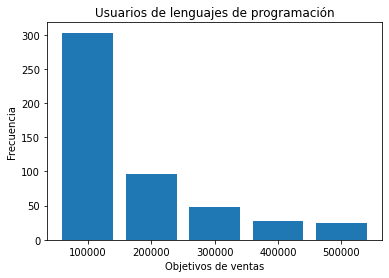

In [ ]:
#@title Comprueba los datos históricos de objetivo de ventas

x = sales_target_values
cont100000=0
cont200000=0
cont300000=0
cont400000=0
cont500000=0
for i in sales_target:
  if i==100000:
    cont100000+=1
  elif i==200000:
    cont200000+=1
  elif i==300000:
    cont300000+=1
  elif i==400000:
    cont400000+=1
  elif i==500000:
    cont500000+=1
list_sales_target=[cont100000,cont200000, cont300000, cont400000, cont500000]

plt.bar([str(i) for i in x], list_sales_target)
 
plt.ylabel('Frecuencia')
 
plt.xlabel('Objetivos de ventas')

plt.title('Usuarios de lenguajes de programación')

plt.show()

##Calcular el historico de ventas

Crear una función llamada historico_ventas que tomando por parámetros dos arrays de 1-D (n,) los convierta en las columnas de una matriz 2-D (n x 2). Calcule una tercera columna que contenga el resultado de multiplicar cada fila. Y devuelva la matriz [n,3].



In [ ]:
#Crea la funcion historico_ventas

def historico_ventas(array1, array2):
  array3 = array1*array2
  array4 = np.column_stack((array1, array2, array3))

  return array4



print(historico_ventas(pct_ventas,sales_target))

[[0.91 300000.00 272096.71]
 [1.12 100000.00 111684.85]
 [1.16 100000.00 116275.43]
 ...
 [1.06 500000.00 532108.07]
 [0.91 200000.00 182434.40]
 [0.97 400000.00 387135.06]]


In [ ]:
#@title Comprueba el histórico de ventas
def check2():
  if pct_ventas[0]*sales_target[0]==historico_ventas(pct_ventas,sales_target)[0][2] and pct_ventas[5]*sales_target[5]==historico_ventas(pct_ventas,sales_target)[5][2] and len(historico_ventas(pct_ventas,sales_target))*len(historico_ventas(pct_ventas,sales_target)[0])==1500:
    return 'Correcto'
  else:
    return 'Incorrecto'

check2()

'Correcto'

#Calcular el ratio de comision para cada vendedor

Crea la funcion ratio_comision que reciba un % de ventas conseguido en tanto por uno y devuelva la comisión correspondiente según la tabla:

|% ventas conseguid|Ratio de comisión|
|---|---|
|0.8-0.9|2%|
|0.91-0.99|3%|
|>=1|4%|



In [ ]:
#Crea la funcion ratio_comision

def ratio_comision(percent):
  if percent < 0.8:
    ratio = 0    
  elif 0.8 <= percent <= 0.9:
    ratio = 0.02       
  elif 0.9 < percent <= 0.99:
    ratio = 0.03    
  elif percent > 0.99:
    ratio = 0.04    
  return ratio


for percent in [0.7, 0.9,0.95,1]:
  print(ratio_comision(percent))

0
0.02
0.03
0.04


In [ ]:
#@title Comprueba la funcion ratio_comision
def check3():
  if ratio_comision(0.99)==0.03 and ratio_comision(0.6)==0 and ratio_comision(1.5)==0.04:
    return 'Correcto'
  else:
    return 'Incorrecto'
check3()


'Correcto'

##Calcular ratio de comision y cantidad de comision para los 500 empleados

Crea la función comision, que tomando una matriz (donde la primera columna es el porcentaje de objetivo de ventas conseguido, la segunda es el objetivo de ventas y la tercera, las ventas conseguidas) devuelva la matriz introducida como parámetro con dos columnas más (la cuarta será el ratio de comisión y la quinta la comision que hay que pagar a dicho empleado).



In [ ]:
# Crea la funcion comision

def comision(M):
  ratio_com = []
  for i in pct_ventas:
    ratio_com.append(ratio_comision(i))
  
  pago_com = ratio_com*pct_ventas*sales_target
  array_final = np.column_stack((M, ratio_com, pago_com))

  return array_final

print(comision(historico_ventas(pct_ventas,sales_target)))

[[0.91 300000.00 272096.71 0.03 8162.90]
 [1.12 100000.00 111684.85 0.04 4467.39]
 [1.16 100000.00 116275.43 0.04 4651.02]
 ...
 [1.06 500000.00 532108.07 0.04 21284.32]
 [0.91 200000.00 182434.40 0.03 5473.03]
 [0.97 400000.00 387135.06 0.03 11614.05]]


In [ ]:
#@title Comprueba la función comision
def check4():
  if len(comision(historico_ventas(pct_ventas,sales_target)))==500 and len(comision(historico_ventas(pct_ventas,sales_target))[0])==5 and comision(historico_ventas(pct_ventas,sales_target))[0,2]*comision(historico_ventas(pct_ventas,sales_target))[0,3]==comision(historico_ventas(pct_ventas,sales_target))[0,4]:
    return 'Correcto'
  else:
    return 'Incorrecto'

check4()

'Correcto'

##Simulacion de montecarlo

Una vez preparadas todas las herramientas necesarias vamos a crear la funcion montecarlo que tenga como parámetro el número de simulaciones que queremos hacer.

La función montecarlo deberá:

* Crear unos objetivos de ventas siguiendo la distribuccion uniforme con diferentes probabilidades.
* Crear un porcentaje de ventas alcanzado siguiendo una distribucion normal

* Calcular las ventas reales, el ratio de comisión, la comision de cada empleado.
* Guardar para cada simulación los totales de la empresa (suma de todos los empleados) de ventas, objetivo de ventas y comisiones.

* Una vez echas todas las simulaciones obtener la media, la derivación estandar, el mínimo y el máximo para cada uno de los totales de la empresa. La función debe devolver la matriz 4 x 3 con la primera columna las ventas reales, la segunda columna el objetivo de ventas y la tercera la comisión total. Y las filas: la media, la derivación estandar, el mínimo y el máximo. (En ese orden).


Entrada:

      print(montecarlo (1000))

Salida:

      [[87634053.00 87626400.00 2965409.90]
      [2566056.38 2531273.01 99840.39]
      [80266000.00 79800000.00 2667370.00]
      [96279000.00 95800000.00 3291020.00]]



In [ ]:
#Crea la funcion montecarlo
def montecarlo(n):
  def auxiliar(): 
      pct_ventas = np.random.normal(loc=1, scale=0.1, size= 500)

      sales_target_values = [100000, 200000, 300000, 400000, 500000]
      sales_target_prob = [.6, .2, .1, .05, .05]
      sales_target = [elige_con_probabilidad(sales_target_values, sales_target_prob) for _ in range(500)]

      historico_ventas(pct_ventas,sales_target)

      comisiones = comision(historico_ventas(pct_ventas,sales_target))
    
      array_suma = np.sum(comisiones, axis=0)
      array_suma_limpio = np.delete(array_suma, (0,3))

      return array_suma_limpio

  Matriz_simu = np.empty((0,3))
  for i in range(n):    
   Matriz_simu = np.append(Matriz_simu, [auxiliar()], axis=0)
  
  media = np.mean(Matriz_simu, axis=0)
  std = np.std(Matriz_simu, axis=0)
  min = np.amin(Matriz_simu, axis=0)
  max = np.amax(Matriz_simu, axis=0)

  # Objetivos ventas = columna 0, Ventas = columna 1, comisiones = columna2

  Matriz_final = np.row_stack((media, std, min, max))

  Matriz_final[:, [1, 0]] = Matriz_final[:, [0, 1]]

  return Matriz_final





print(montecarlo(1000))


[[87573144.44 87583700.00 3026228.34]
 [2573139.92 2535066.92 0.00]
 [79480596.23 79400000.00 3026228.34]
 [95624650.81 95200000.00 3026228.34]]


In [ ]:
#@title Comprueba la función montecarlo
montecarlo1=montecarlo(1000)
def check5():
  if montecarlo1[0,0]>=montecarlo1[2,0] and montecarlo1[0,0]<=montecarlo1[3,0]:
    return 'Correcto'
  else:
    return 'Incorrecto'
check5()

'Correcto'

In [ ]:
#@title Consigue el Token para corregir en Nodd3r:

import hashlib
token_result=montecarlo(1000)
pwd = hashlib.sha256(str(len(token_result)+pct_ventas.std().round(1)+pct_ventas.mean().round(1)+ len(pct_ventas)).encode())
#print('El token es:\n',pwd.hexdigest())
if pwd.hexdigest()[0:6] == 'cb0555':
  print('¡Felicidades! puedes avanzar al siguiente modulo \n El token es: ',pwd.hexdigest())
else:
  print('Hay algún error en el código o tu forma es diferente a la planteada, pregunta por el foro si no lo ves claro.')

¡Felicidades! puedes avanzar al siguiente modulo 
 El token es:  cb055523f043c7309187d7e6145f891eb9dfdc040e15bd31d739f0dc4427f2fa
